In [8]:
import numpy as np
import pandas as pd
import time
import datetime     
from time import mktime
from datetime import datetime
import geopy

In [9]:
all_data = pd.read_csv(r'/Users/alakhsharma/Downloads/archive/pacific.csv')
all_data = all_data[['ID','Name','Date','Time','Status','Latitude','Longitude','Maximum Wind','Minimum Pressure']]
all_data.sample(5)

ID                 Name      Date  Time Status Latitude  \
6119   EP091975                 ILSA  19750820  1200     TS    13.7N   
6092   EP081975               HILARY  19750813  1200     TS    12.3N   
19044  EP082002               FAUSTO  20020831  1800     TD    32.9N   
4005   EP051970            FRANCESCA  19700709  1200     TD    15.6N   
11020  EP081986               HOWARD  19860818  1200     TD    23.2N   

      Longitude  Maximum Wind  Minimum Pressure  
6119     101.8W            60              -999  
6092     110.5W            40              -999  
19044    162.3W            30              1010  
4005     121.3W            25              -999  
11020    115.2W            20              -999

In [10]:
all_data = all_data.replace(to_replace=-999, value=0, regex=True)
x = all_data[["Minimum Pressure"]].mean(axis=0)
all_data = all_data.replace(to_replace=0, value=x, regex=True)
all_data.sample(5)

ID                 Name      Date  Time Status Latitude  \
17813  EP021999              BEATRIZ  19990712   600     HU    14.0N   
11634  EP171987                RAMON  19871007  1200     HU    13.7N   
16131  EP031995              BARBARA  19950711     0     HU    13.7N   
14159  EP051992                DARBY  19920706     0     HU    18.8N   
1596   EP121959              UNNAMED  19591027     0     HU    18.4N   

      Longitude  Maximum Wind  Minimum Pressure  
17813    117.4W            90        970.000000  
11634    109.8W            65        507.566591  
16131    115.3W           115        945.000000  
14159    111.5W           100        972.000000  
1596     105.1W           120        507.566591

In [11]:
TIME = []
for entry in all_data.iterrows():
    try:
        if entry[1].Time == 0: 
            TIME.append(datetime.strptime(str(entry[1].Date)+' '+str(entry[1].Time),'%Y%m%d %H'))
        else:
            TIME.append(datetime.strptime(str(entry[1].Date)+' '+str(entry[1].Time),'%Y%m%d %H%M'))
    except:
        TIME.append(np.nan)
        continue

In [12]:
len(TIME) == len(all_data)

True

In [13]:
all_data = all_data[['ID','Name','Status','Latitude','Longitude','Maximum Wind','Minimum Pressure']]
all_data['TIME'] = TIME
all_data.tail()

ID                 Name Status Latitude Longitude  Maximum Wind  \
26132  EP222015               SANDRA     LO    21.7N    109.0W            35   
26133  EP222015               SANDRA     LO    22.4N    108.7W            30   
26134  EP222015               SANDRA     LO    23.1N    108.3W            30   
26135  EP222015               SANDRA     LO    23.5N    107.9W            25   
26136  EP222015               SANDRA     LO    24.2N    107.7W            20   

       Minimum Pressure                TIME  
26132            1002.0 2015-11-28 12:00:00  
26133            1007.0 2015-11-28 18:00:00  
26134            1008.0 2015-11-29 00:00:00  
26135            1009.0 2015-11-29 06:00:00  
26136            1010.0 2015-11-29 12:00:00

In [14]:
from collections import defaultdict
def get_year():
    years = defaultdict(list)
    for entry in all_data.iterrows():
        years[entry[1].TIME.year].append(entry[1].ID)
    yearz = {}
    each_yr = []
    for key in years:
        each_yr.append(key)
        yearz[key] = set(years[key])
    num_hurricanes = []
    for x in yearz.values(): 
        num_hurricanes.append(len(x))
    return (each_yr, num_hurricanes)
def get_months():
    months = defaultdict(list)
    for entry in all_data.iterrows():
        months[entry[1].TIME.month].append(entry[1].ID)
    m = {}
    each_month = []
    for key in months:
        each_month.append(key)
        m[key] = set(months[key])
    num_hurricanes = []
    for x in m.values(): 
        num_hurricanes.append(len(x))
    return (each_month, num_hurricanes)

<Axes: >

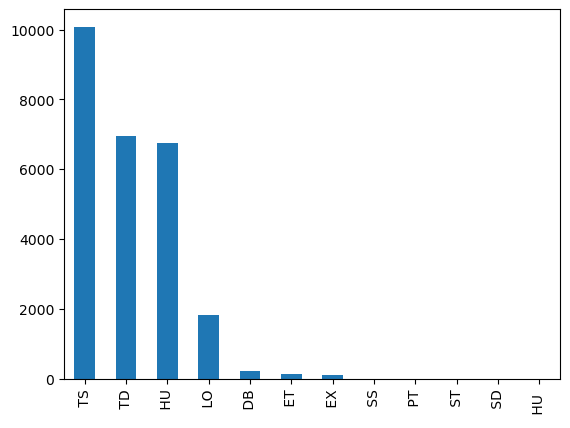

In [15]:
import matplotlib.pyplot as plt
all_data["Status"].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Number of Hurricanes in the Atlantic')

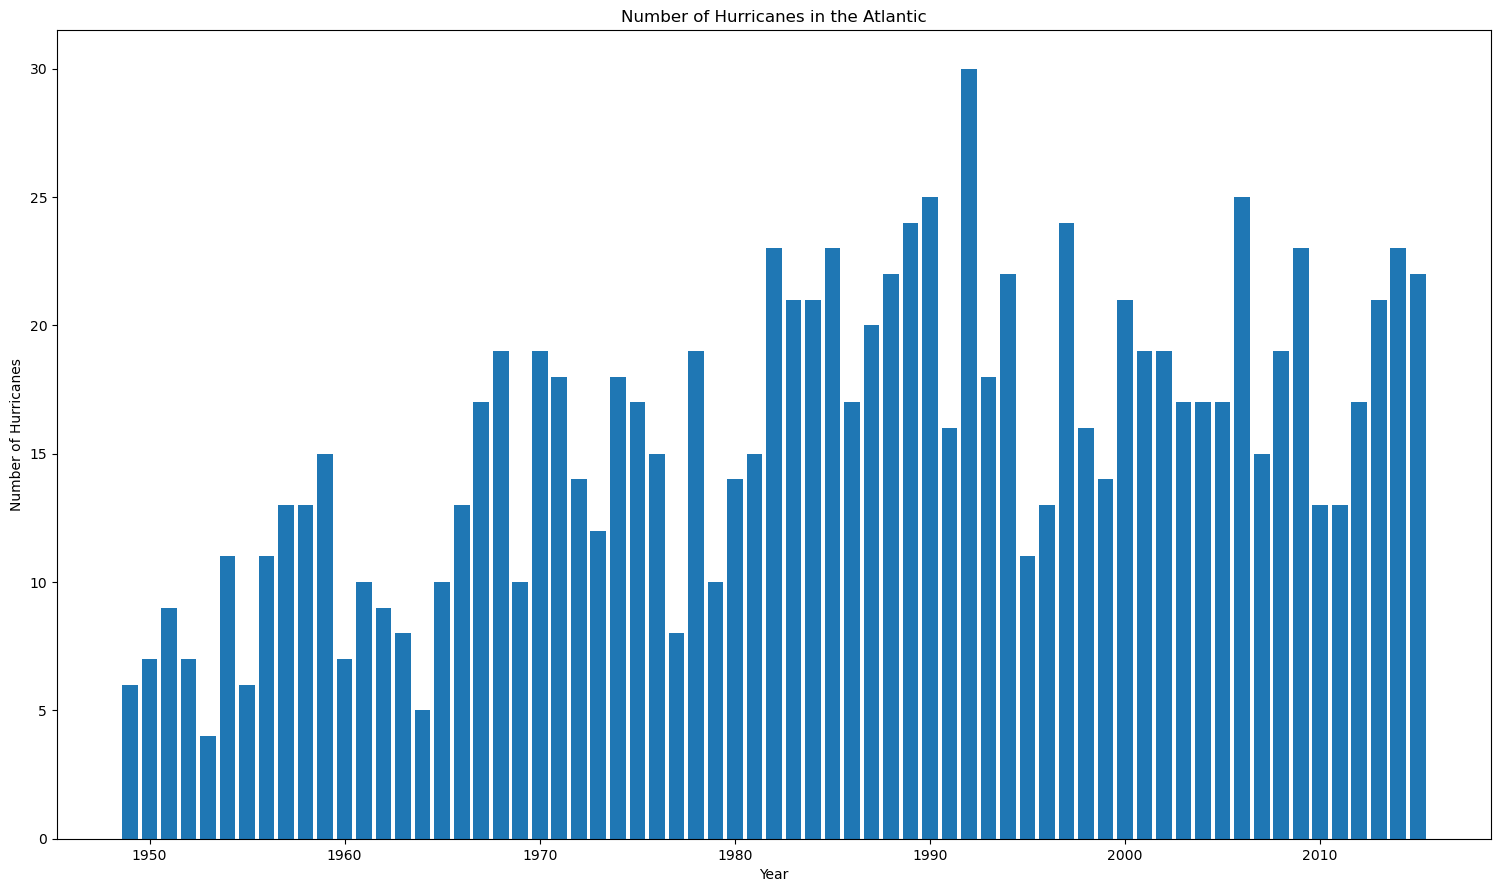

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
year_info = get_year()
plt.bar(year_info[0], year_info[1])
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Hurricanes in the Atlantic')

Text(0.5, 1.0, 'Hurricanes by Month')

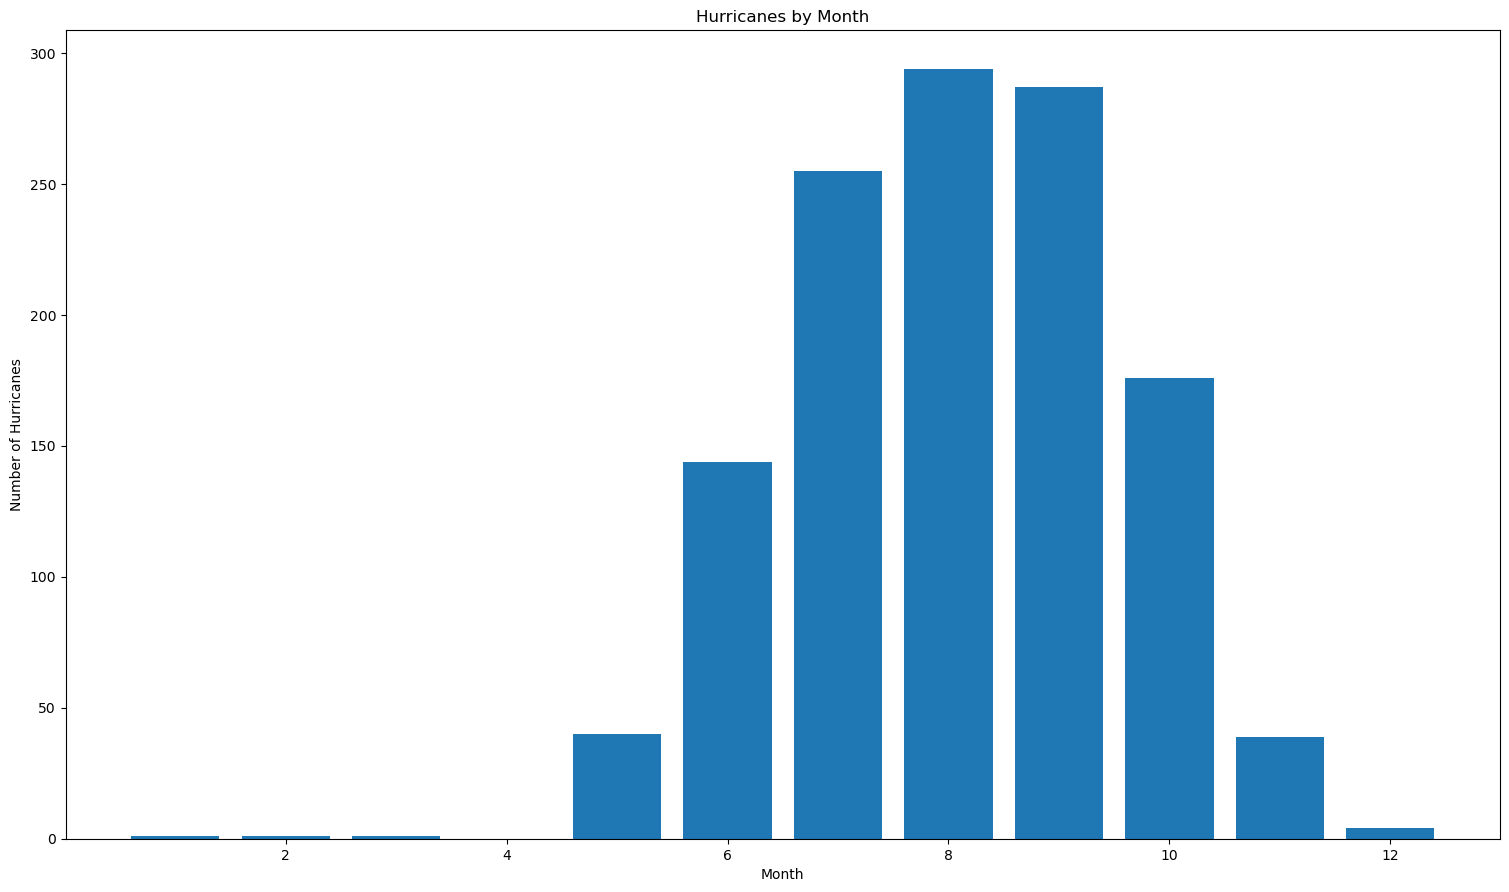

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
month_info = get_months()
plt.bar(month_info[0], month_info[1])
plt.xlabel('Month')
plt.ylabel('Number of Hurricanes')
plt.title('Hurricanes by Month')

In [18]:
import re
new_lat = []
new_long = []
for entry in all_data.iterrows(): 
    match = re.search('\d+.\d+', entry[1]['Latitude'])
    match2 = re.search('\d+.\d+', entry[1]['Longitude'])
    new_lat.append(float(match.group()))
    new_long.append(float('-'+match2.group()))
all_data['Longitude'] = new_long
all_data['Latitude'] = new_lat
long = all_data.groupby('ID')['Longitude'].apply(list)
lat = all_data.groupby('ID')['Latitude'].apply(list)

In [19]:
print("Are lat and long the same length? " + str(len(lat)==len(long)))
print(lat.head())
print(long.head())

Are lat and long the same length? True
ID
CP011950    [14.5, 14.9, 15.2, 15.5, 15.7, 15.9, 16.3, 16....
CP011957    [15.0, 15.0, 15.1, 15.2, 15.3, 15.7, 16.2, 17....
CP011958    [19.7, 19.8, 20.0, 20.1, 20.2, 20.3, 20.3, 20....
CP011959    [15.7, 15.8, 15.7, 15.6, 15.5, 15.3, 15.3, 15....
CP011963    [12.5, 12.3, 12.0, 11.8, 11.7, 11.7, 11.7, 11....
Name: Latitude, dtype: object
ID
CP011950    [-144.5, -144.8, -145.2, -145.6, -145.8, -146....
CP011957    [-149.6, -150.5, -151.6, -152.6, -153.5, -154....
CP011958    [-154.5, -155.0, -155.5, -155.9, -156.4, -157....
CP011959    [-141.2, -141.8, -142.9, -144.0, -144.9, -145....
CP011963    [-147.0, -148.6, -150.0, -151.6, -153.0, -154....
Name: Longitude, dtype: object


In [20]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


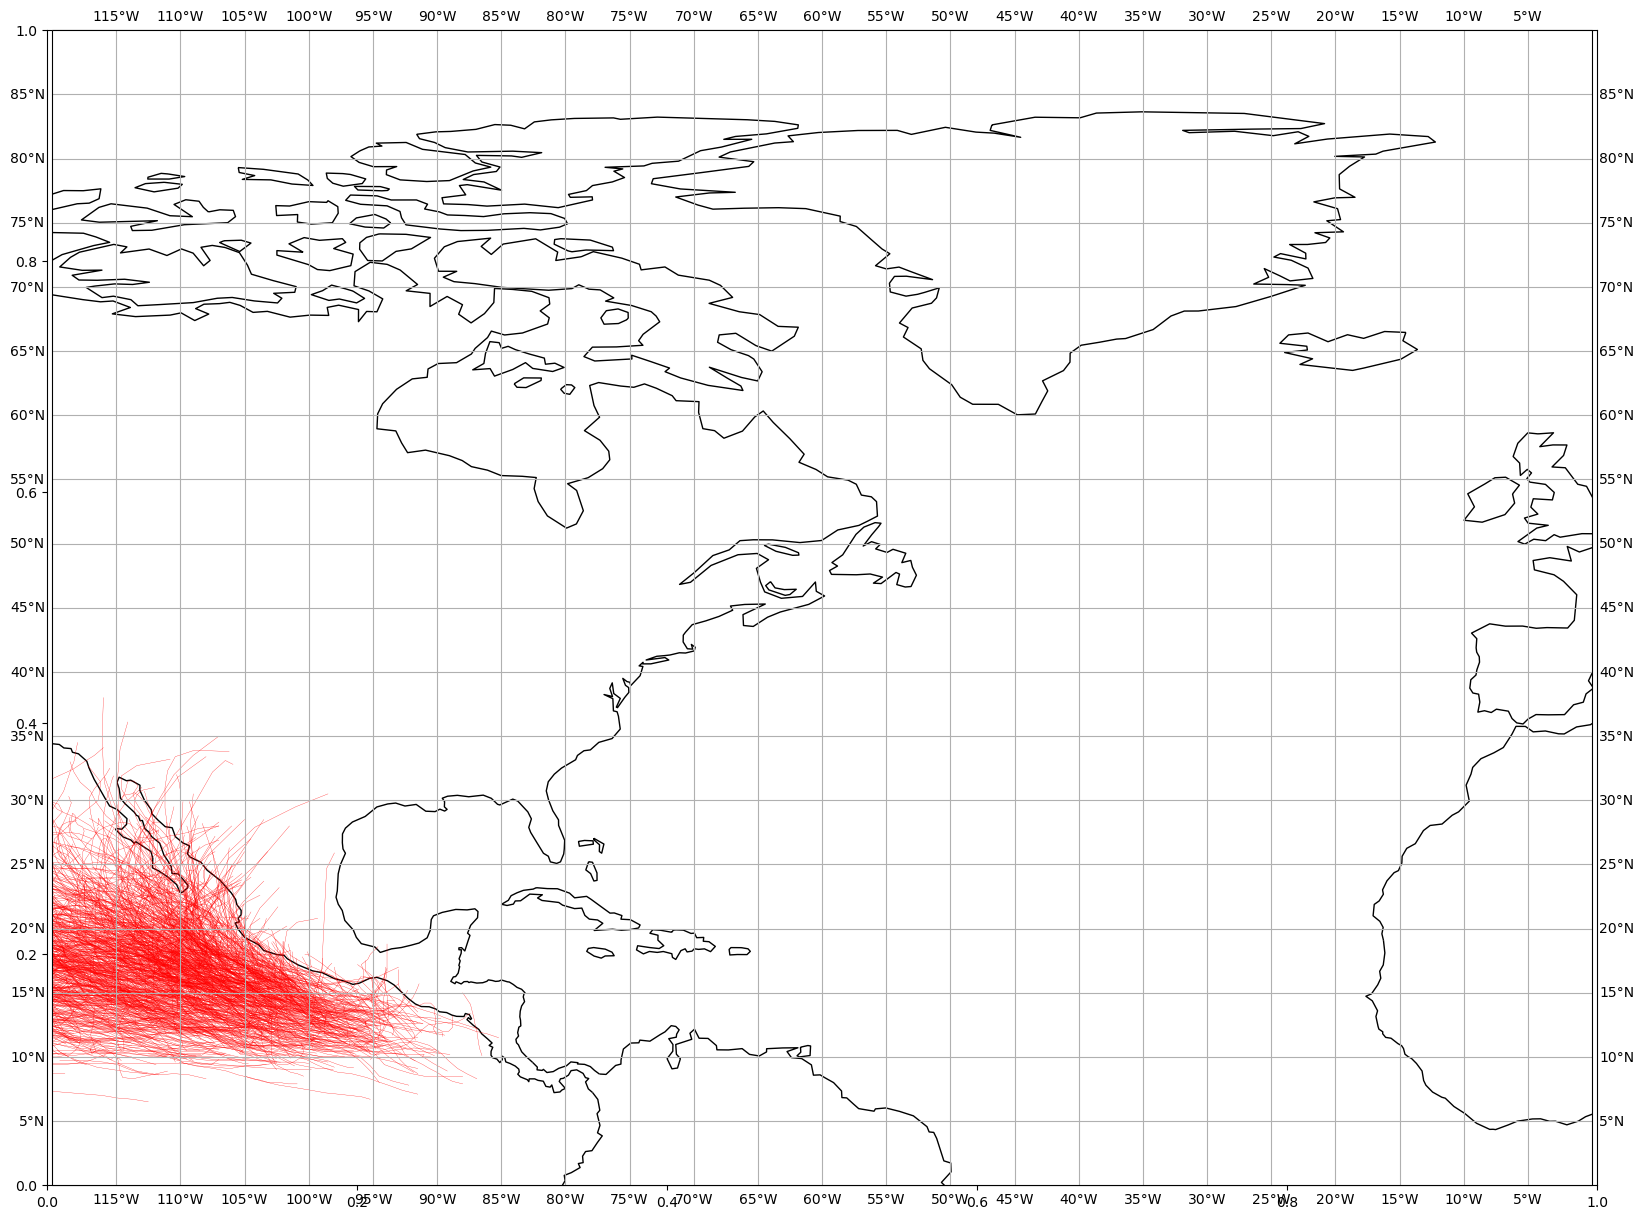

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
for index in range(len(lat)):
    if (lat.index[index] == 'AL122005'):
        ax.plot(long[index],lat[index],'b-',linewidth=2)
    elif (lat.index[index] == 'AL182012'):
        ax.plot(long[index],lat[index],'g-',linewidth=2)
    else:
        ax.plot(long[index],lat[index],'r-',linewidth=0.2)
plt.show()

In [22]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


/var/folders/3b/7g17_jkn6wq4993m2tfknx_80000gn/T/ipykernel_23047/3695059753.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  start_mid_end = start_mid_end.append({'id':long.index[index], 'start_long':long[index][0],'start_lat':lat[index][0], 'mid_long':long[index][l],'mid_lat':lat[index][l],'death_long':long[index][-1],'death_lat':lat[index][-1]},ignore_index=True)
/var/folders/3b/7g17_jkn6wq4993m2tfknx_80000gn/T/ipykernel_23047/3695059753.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  start_mid_end = start_mid_end.append({'id':long.index[index], 'start_long':long[index][0],'start_lat':lat[index][0], 'mid_long':long[index][l],'mid_lat':lat[index][l],'death_long':long[index][-1],'death_lat':lat[index][-1]},ignore_index=True)
/var/folders/3b/7g17_jkn6wq4993m2tfknx_80000gn/T/ipykernel_23047/3695059753.py

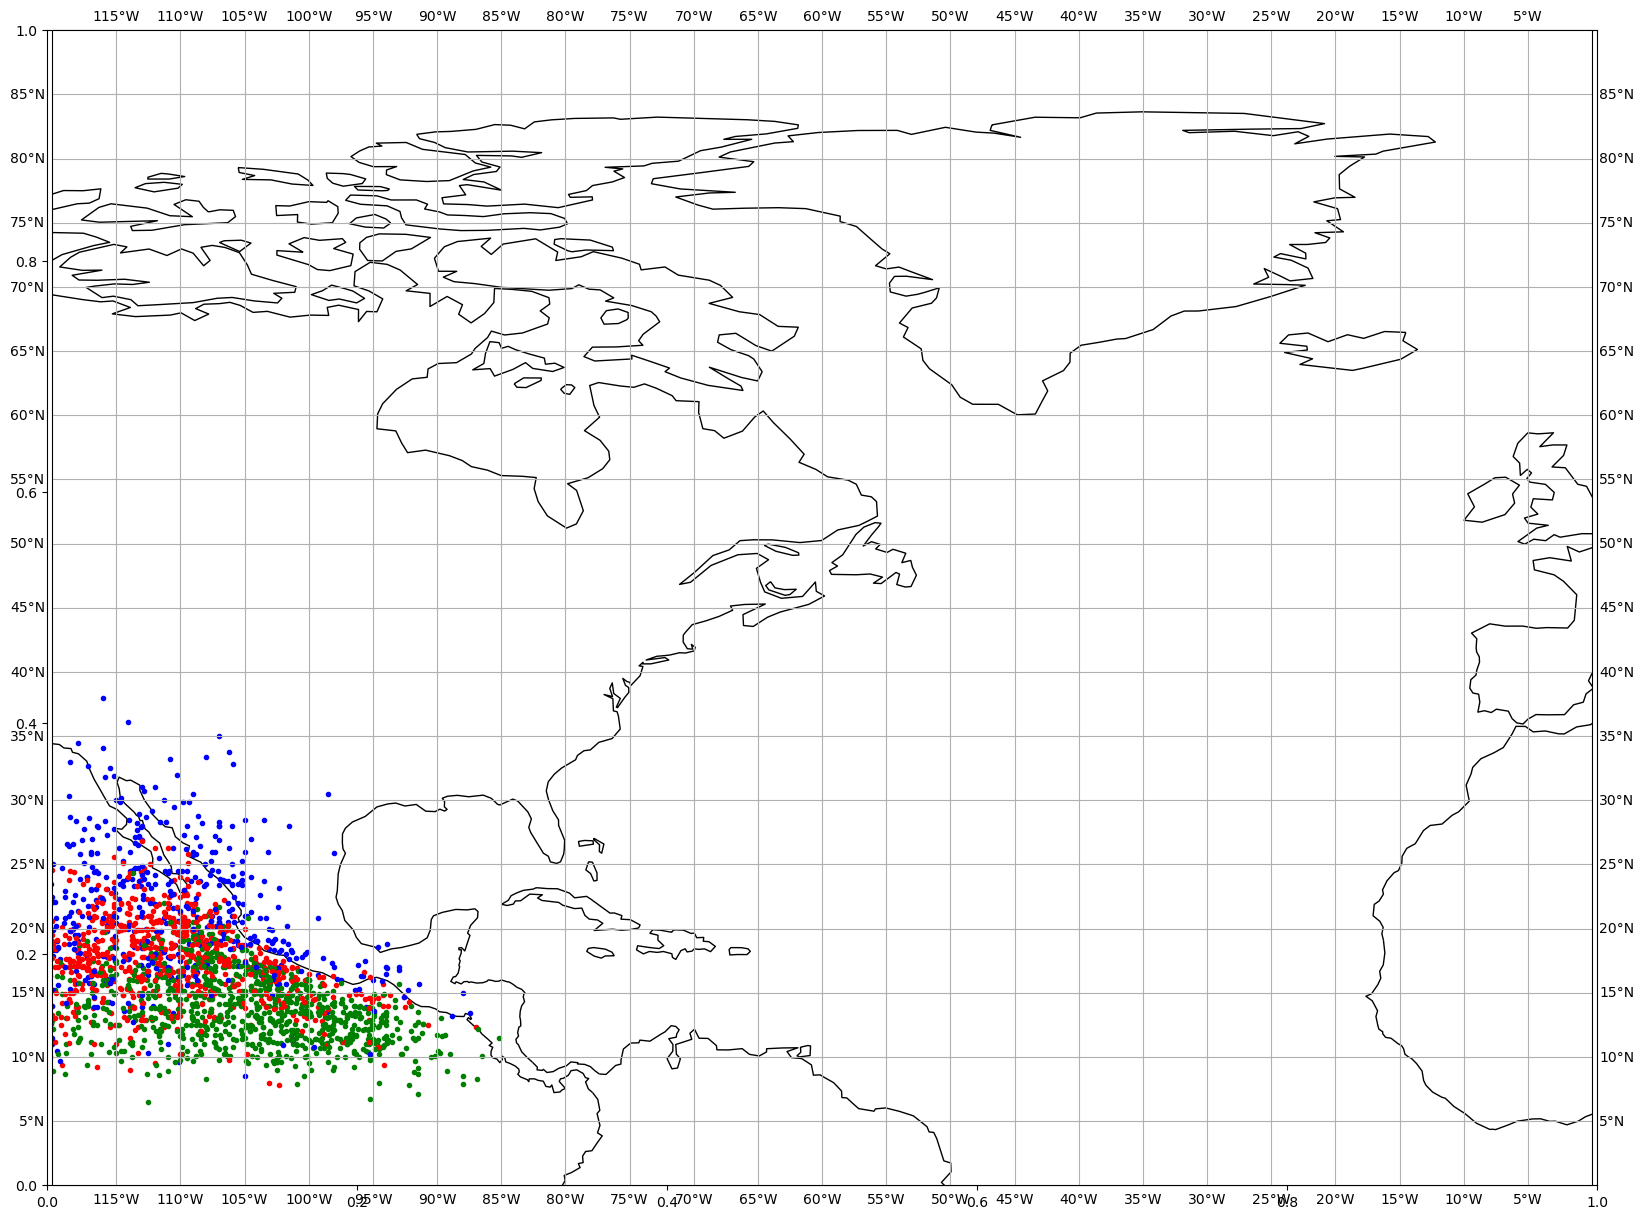

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
start_mid_end = pd.DataFrame(columns=['id', 'start_long','start_lat', 'mid_long','mid_lat','death_long','death_lat'])
for index in range(len(lat)):
    l = int(len(long[index])/2)
    ax.plot(long[index][l],lat[index][l],'ro',markersize=3)
    ax.plot(long[index][-1],lat[index][-1],'bo',markersize=3)
    ax.plot(long[index][0],lat[index][0],'go',markersize=3)
    start_mid_end = start_mid_end.append({'id':long.index[index], 'start_long':long[index][0],'start_lat':lat[index][0], 'mid_long':long[index][l],'mid_lat':lat[index][l],'death_long':long[index][-1],'death_lat':lat[index][-1]},ignore_index=True)  
plt.show()

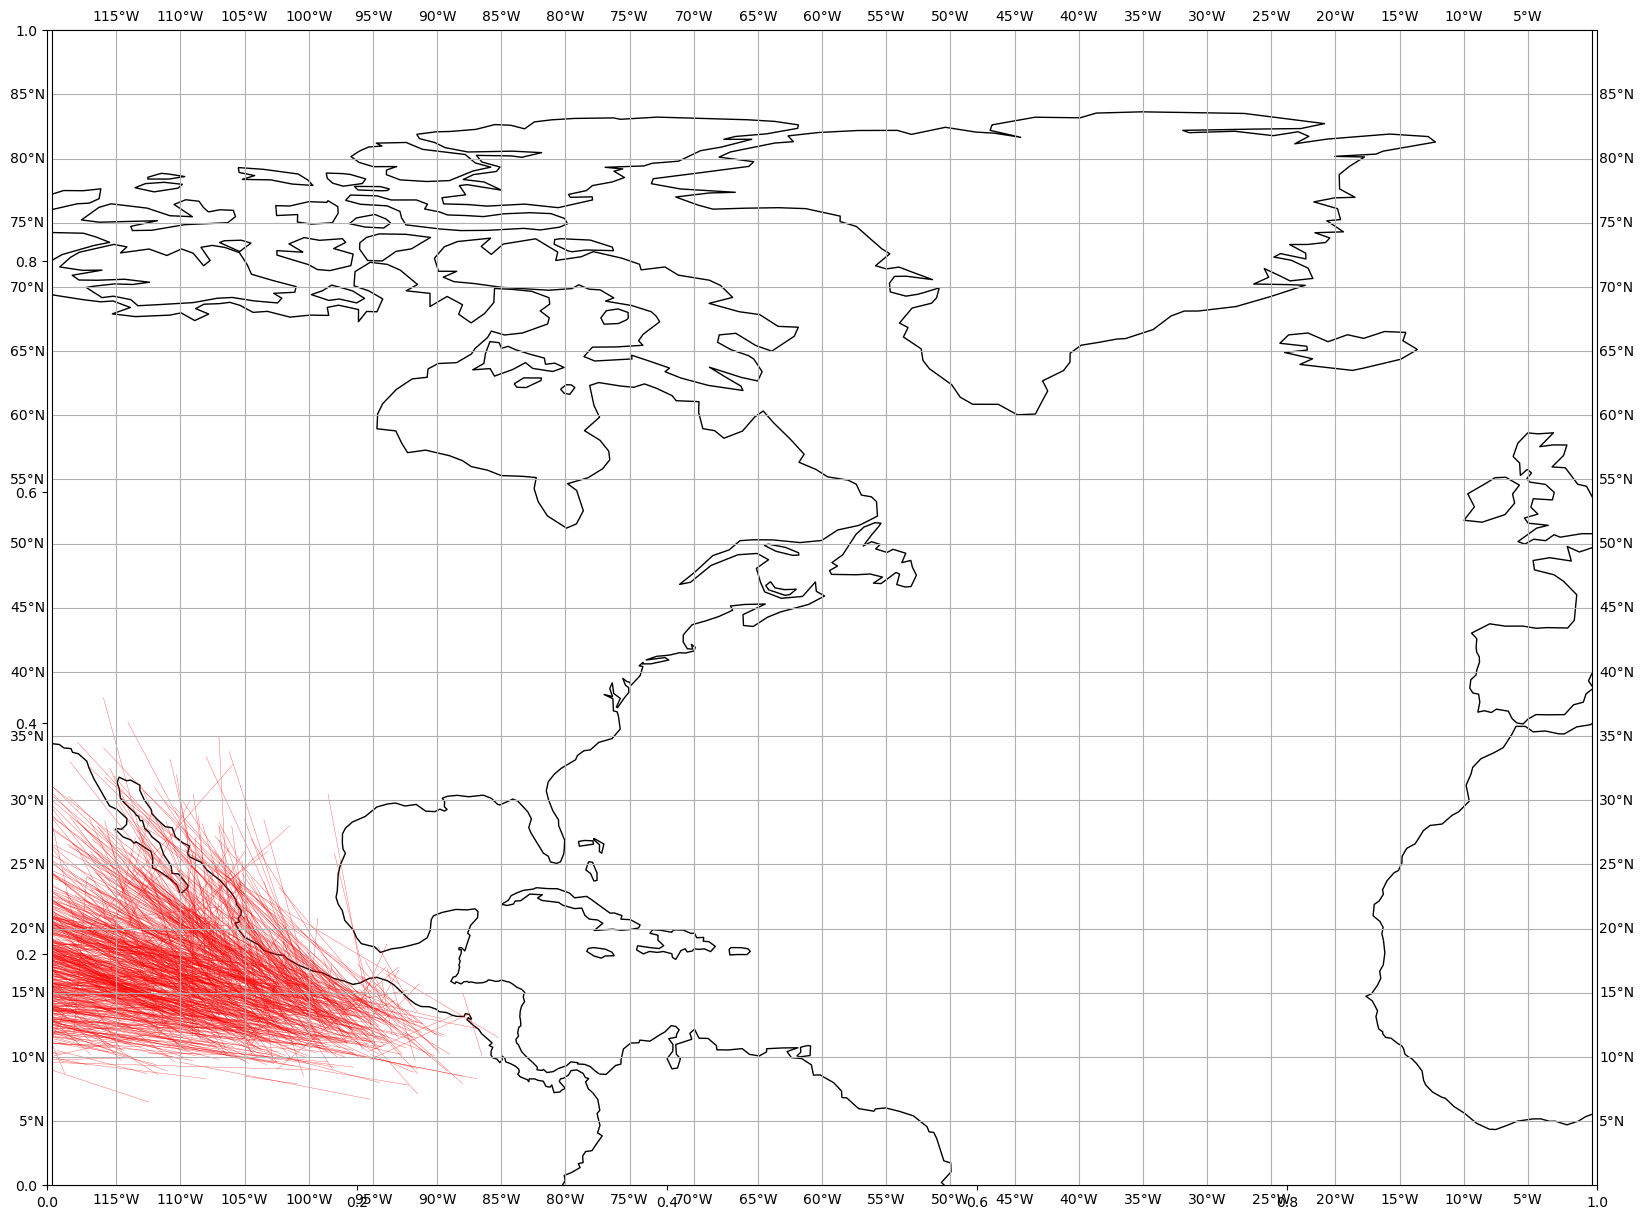

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
slope = []
for index in range(len(lat)):
    ax.plot([long[index][0],long[index][-1]],[lat[index][0],lat[index][-1]],'r-',linewidth=0.2) 
    if (long[index][-1]-long[index][0] == 0):
        slope.append(None)
    else:
        slope.append((lat[index][-1] - lat[index][0])/(long[index][-1] - long[index][0]))
all_slopes = pd.Series(data=slope,index=lat.index)
plt.show()

In [25]:
from geopy.distance import geodesic
dist = []
for index in range(len(lat)):
    d = 0
    for pos in range(len(lat[index])-1):
        p1 = (lat[index][pos], long[index][pos])
        p2 = (lat[index][pos+1], long[index][pos])
        d = d + geodesic(p1,p2).miles
    dist.append(d)
all_dist = pd.Series(data=dist,index=lat.index)
len(all_dist) == len(all_slopes)

True

In [26]:
slope_dist = pd.concat([all_dist, all_slopes], axis=1)
slope_dist.columns =['distance traveled','slope']
slope_dist.sample(5)

distance traveled     slope
ID                                   
EP182000         130.592063 -0.074627
EP091986         515.863898 -0.270142
EP161975         412.508984 -0.342857
EP061959         185.875092 -0.013333
EP061989         831.953247 -0.195612

(-25.0, 25.0)

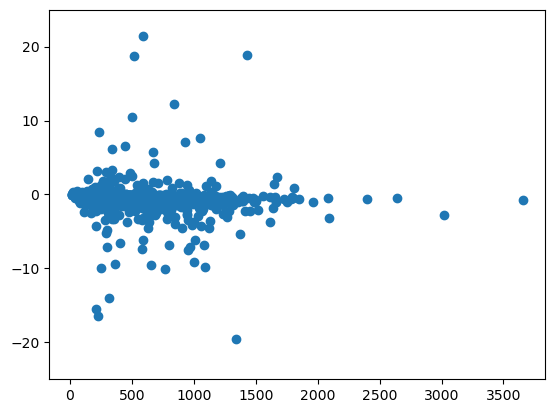

In [27]:
plt.scatter(slope_dist['distance traveled'], slope_dist['slope'])
plt.ylim(-25,25)

In [28]:
start_mid_end

id  start_long  start_lat  mid_long  mid_lat  death_long  \
0     CP011950      -144.5       14.5    -159.6     24.7      -178.0   
1     CP011957      -149.6       15.0    -173.9     25.3      -163.5   
2     CP011958      -154.5       19.7    -156.4     20.2      -160.4   
3     CP011959      -141.2       15.7    -153.9     17.0      -163.0   
4     CP011963      -147.0       12.5    -165.2     13.0      -167.6   
...        ...         ...        ...       ...      ...         ...   
1045  EP241990       -99.1       11.3    -108.7     18.8      -115.1   
1046  EP241992       -97.0       11.0    -103.3     14.9      -102.4   
1047  EP251992      -106.6       10.2    -110.0     10.2      -112.5   
1048  EP261992      -107.2       10.8    -131.4     16.8      -141.8   
1049  EP271992      -111.4       12.6    -116.8     17.7      -111.5   

      death_lat  
0          27.4  
1          24.8  
2          19.7  
3          23.2  
4          32.5  
...         ...  
1045       19.4  
1046       21.7  
1047       10.3  
1048       16.2  
1049       19.8  

[1050 rows x 7 columns]

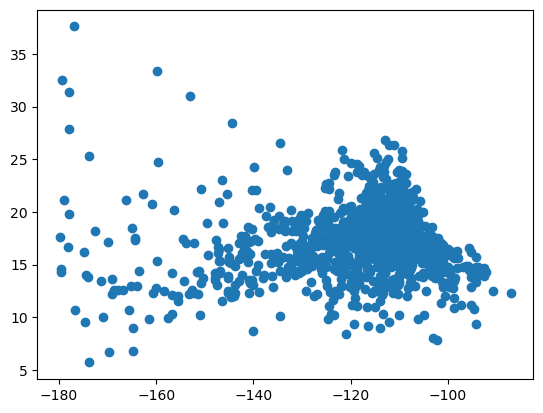

In [29]:
plt.scatter(start_mid_end['mid_long'], start_mid_end['mid_lat'])
plt.show()

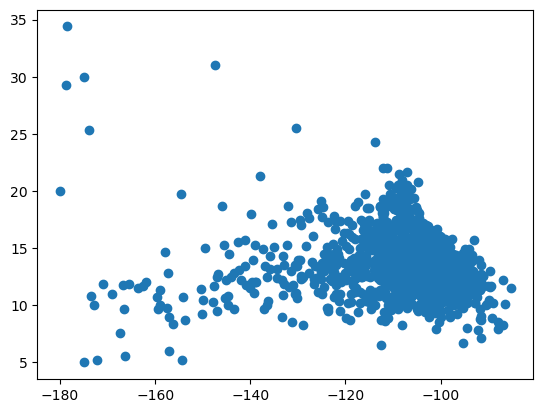

In [30]:
plt.scatter(start_mid_end['start_long'], start_mid_end['start_lat'])
plt.show()

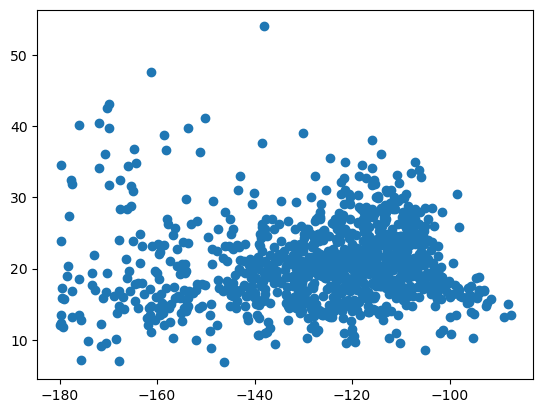

In [31]:
plt.scatter(start_mid_end['death_long'], start_mid_end['death_lat'])
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict

In [33]:
def doAgglo(X, num_clusters):
    model = AgglomerativeClustering(n_clusters=num_clusters, affinity = 'euclidean', linkage = 'ward')
    labels = model.fit_predict(X)
    return (labels)
def get_plot(X1,X2,lab,t):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X1,X2,c=lab, s=50)
    plt.xlim(-120,0)
    plt.ylim(0,90)
    plt.title(str(t) + ' Clusters')
def c_mean_2(vals,labels,n_clusters):
    sorter = defaultdict(list)
    for index in range(len(labels)): 
        sorter[labels[index]].append(vals[index])
    some = 0
    for cluster_num in range(n_clusters): 
        arr = np.asarray(sorter[cluster_num])
        some = some + np.sum(np.square(np.asarray(arr) - np.mean(arr)))
    return some/len(vals)

/Users/alakhsharma/miniconda3/envs/alakh/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/alakhsharma/miniconda3/envs/alakh/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/alakhsharma/miniconda3/envs/alakh/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/alakhsharma/miniconda3/envs/alakh/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/alakhsharma/miniconda3/envs/alakh

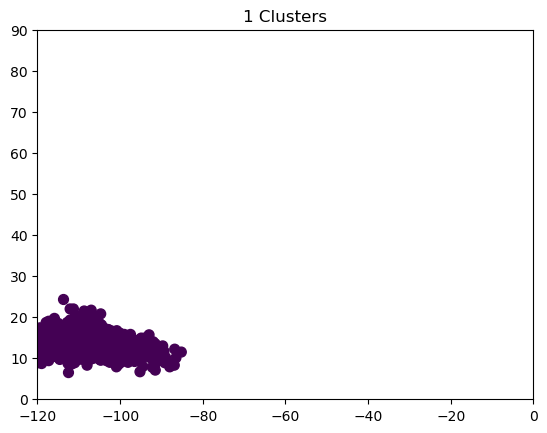

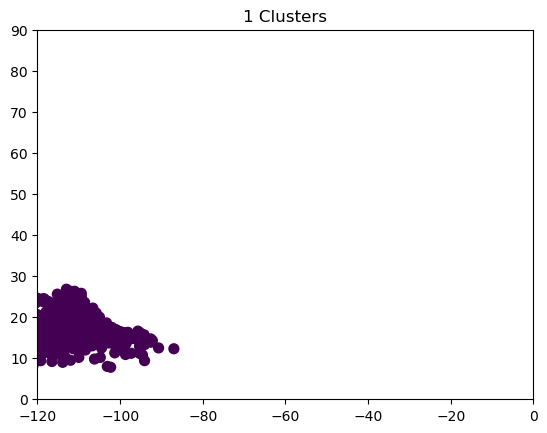

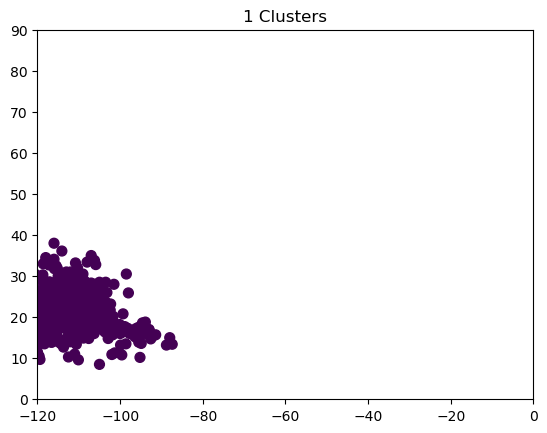

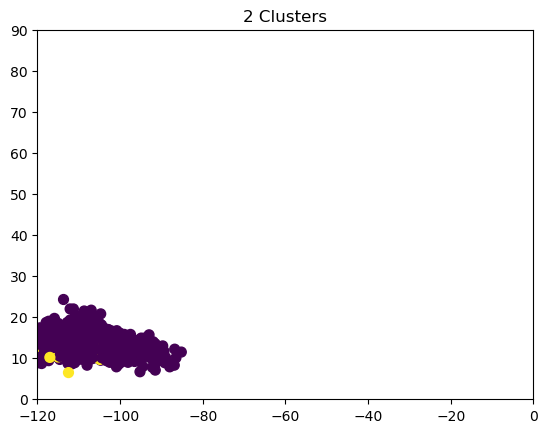

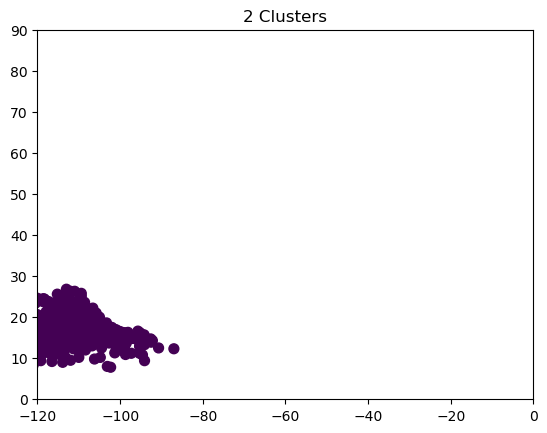

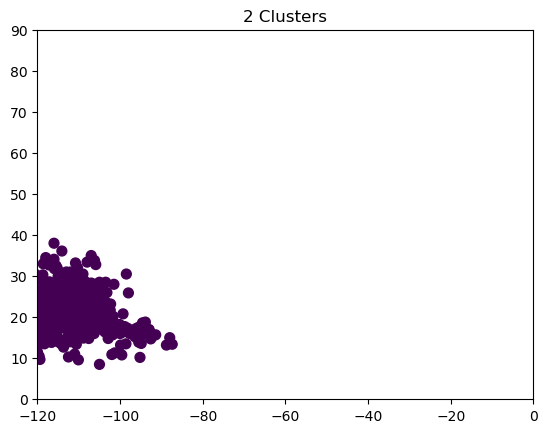

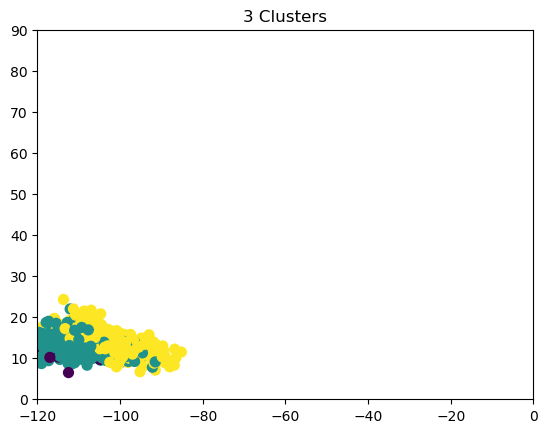

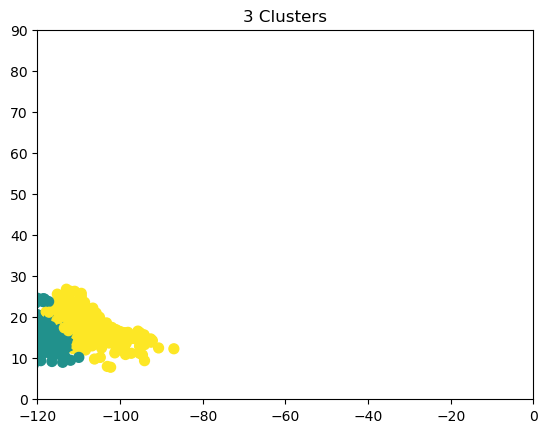

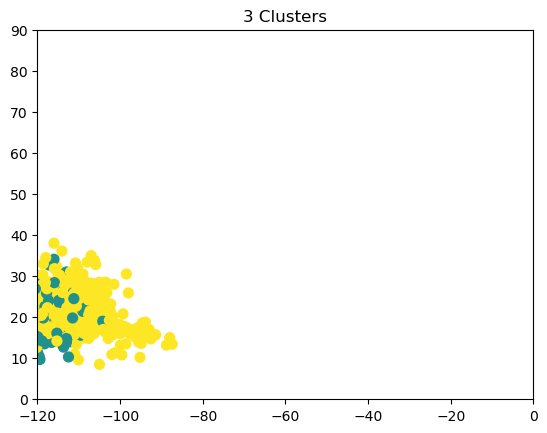

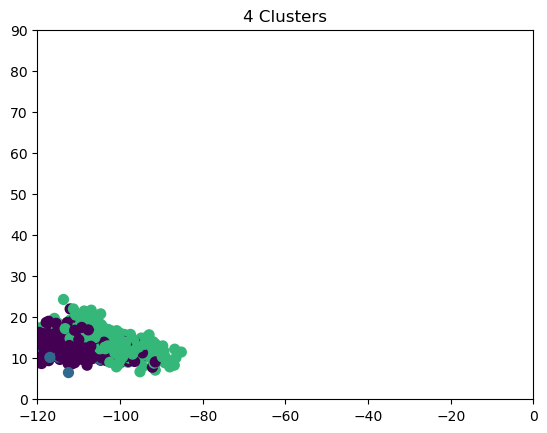

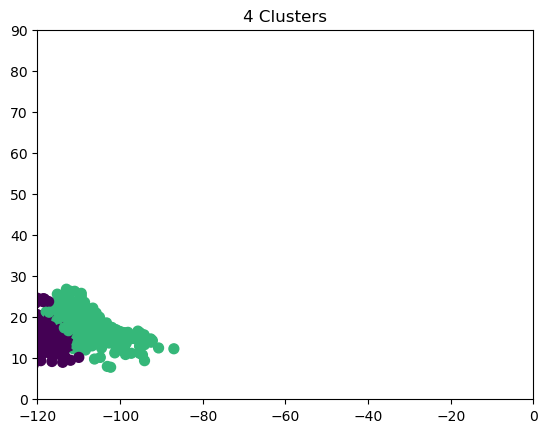

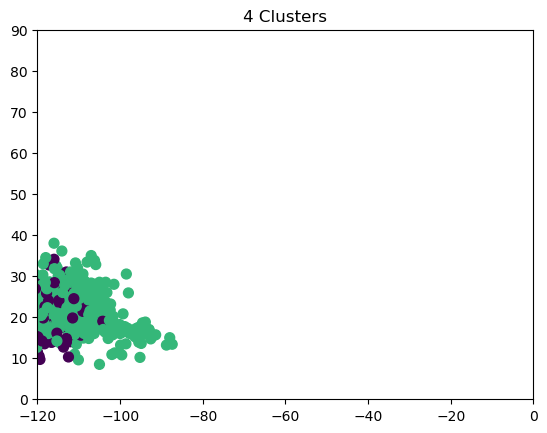

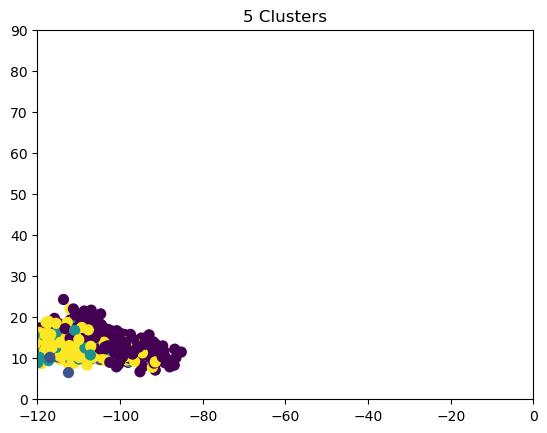

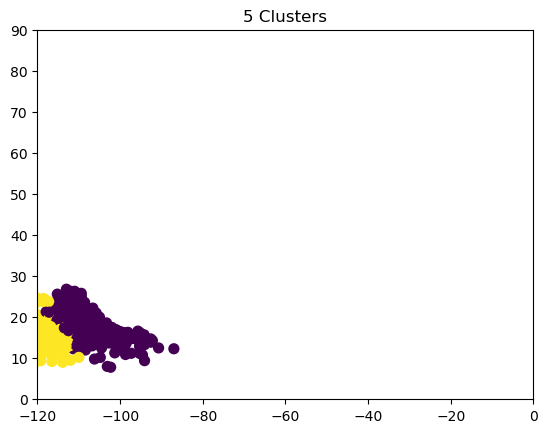

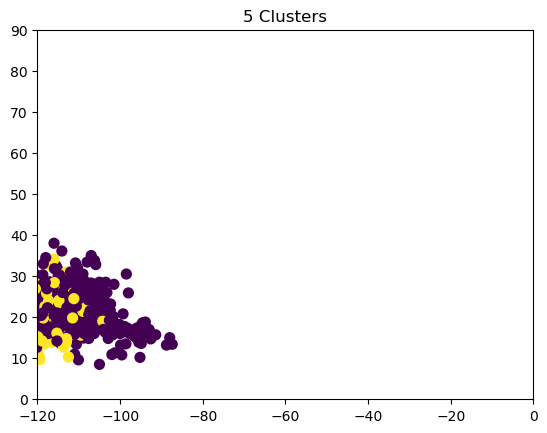

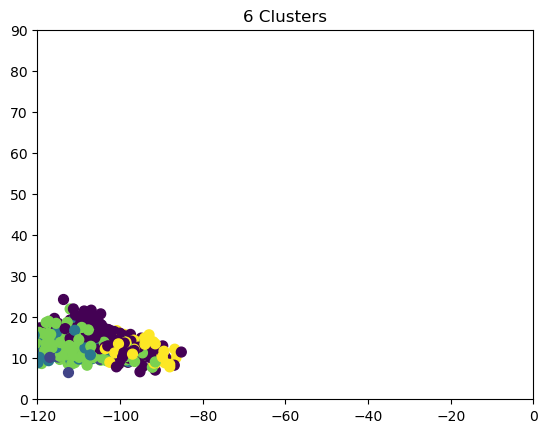

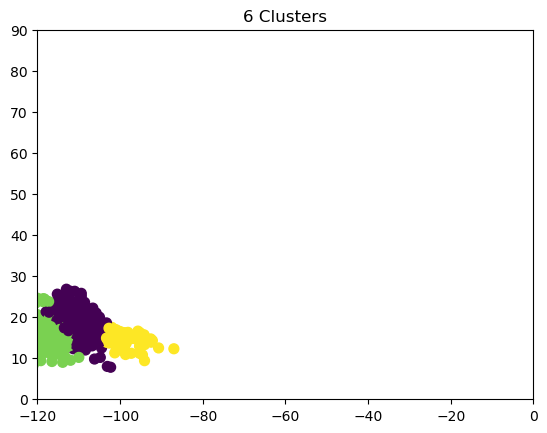

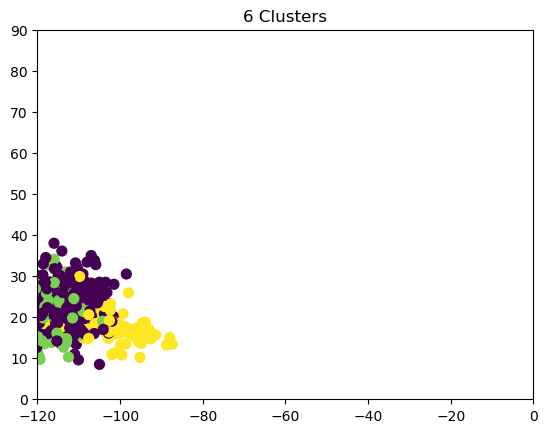

In [34]:
err = []
for i in range(1,7):
    temp = 0
    lab = doAgglo(start_mid_end[['mid_long','mid_lat']],i)
    get_plot(start_mid_end['start_long'],start_mid_end['start_lat'],lab,i)
    get_plot(start_mid_end['mid_long'],start_mid_end['mid_lat'],lab,i)
    get_plot(start_mid_end['death_long'],start_mid_end['death_lat'],lab,i)
    temp = temp + c_mean_2(start_mid_end['mid_long'],lab,i)
    temp = temp + c_mean_2(start_mid_end['mid_lat'],lab,i)
    temp = temp + c_mean_2(start_mid_end['start_long'],lab,i)
    temp = temp + c_mean_2(start_mid_end['start_lat'],lab,i)
    temp = temp + c_mean_2(start_mid_end['death_long'],lab,i)
    temp = temp + c_mean_2(start_mid_end['death_lat'],lab,i)
    err.append(temp)

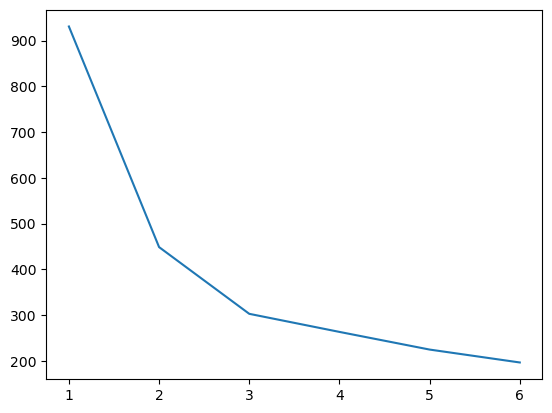

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1,7),err)

In [36]:
lab = doAgglo(start_mid_end[['mid_long','mid_lat']],3)
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
dfALL = pd.DataFrame()
for index in range(len(start_mid_end)):
    if (lab[index] == 0): 
        df0 = df0.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
        dfALL = dfALL.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
    elif (lab[index] == 1): 
        df1 = df1.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
        dfALL = dfALL.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
    elif (lab[index] == 2): 
        df2 = df2.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)  
        dfALL = dfALL.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
print(len(dfALL))

/Users/alakhsharma/miniconda3/envs/alakh/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/var/folders/3b/7g17_jkn6wq4993m2tfknx_80000gn/T/ipykernel_23047/3917019138.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0 = df0.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
/var/folders/3b/7g17_jkn6wq4993m2tfknx_80000gn/T/ipykernel_23047/3917019138.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfALL = dfALL.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
/var/folders/3b/7g17

1050


/var/folders/3b/7g17_jkn6wq4993m2tfknx_80000gn/T/ipykernel_23047/3917019138.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
/var/folders/3b/7g17_jkn6wq4993m2tfknx_80000gn/T/ipykernel_23047/3917019138.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfALL = dfALL.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
/var/folders/3b/7g17_jkn6wq4993m2tfknx_80000gn/T/ipykernel_23047/3917019138.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'id':start_mid_end['id

In [37]:
len(df1) + len(df0) + len(df2)

1050

In [38]:
df0.head()

id                                               lats  \
0  CP011950  [14.5, 14.9, 15.2, 15.5, 15.7, 15.9, 16.3, 16....   
1  CP011957  [15.0, 15.0, 15.1, 15.2, 15.3, 15.7, 16.2, 17....   
2  CP011958  [19.7, 19.8, 20.0, 20.1, 20.2, 20.3, 20.3, 20....   
3  CP011959  [15.7, 15.8, 15.7, 15.6, 15.5, 15.3, 15.3, 15....   
4  CP011963  [12.5, 12.3, 12.0, 11.8, 11.7, 11.7, 11.7, 11....   

                                               longs  
0  [-144.5, -144.8, -145.2, -145.6, -145.8, -146....  
1  [-149.6, -150.5, -151.6, -152.6, -153.5, -154....  
2  [-154.5, -155.0, -155.5, -155.9, -156.4, -157....  
3  [-141.2, -141.8, -142.9, -144.0, -144.9, -145....  
4  [-147.0, -148.6, -150.0, -151.6, -153.0, -154....

In [39]:
df1.head()

id                                               lats  \
0  EP011956                     [13.3, 13.7, 13.9, 14.0, 14.0]   
1  EP011957  [11.9, 11.8, 11.8, 11.8, 11.7, 11.6, 11.5, 11....   
2  EP011965  [11.7, 12.8, 13.7, 14.3, 14.7, 14.9, 15.2, 15....   
3  EP011967  [14.0, 14.5, 14.9, 15.2, 15.4, 15.4, 15.3, 15....   
4  EP011970  [11.1, 11.1, 11.0, 10.9, 10.9, 10.9, 10.9, 10....   

                                               longs  
0           [-113.1, -115.6, -118.0, -120.0, -122.0]  
1  [-108.2, -109.6, -110.7, -111.6, -112.5, -113....  
2  [-106.9, -108.2, -109.6, -111.0, -112.4, -113....  
3  [-117.2, -117.5, -117.9, -118.5, -119.2, -119....  
4  [-98.6, -99.3, -99.9, -100.4, -100.9, -101.9, ...

In [40]:
df2.head()

id                                               lats  \
0  EP011949         [20.2, 20.2, 20.2, 20.3, 20.4, 20.5, 20.6]   
1  EP011950  [14.1, 14.2, 14.4, 14.8, 15.2, 15.4, 15.6, 15....   
2  EP011951  [11.0, 11.5, 12.1, 12.8, 13.6, 14.3, 15.0, 15....   
3  EP011952  [12.9, 13.5, 14.1, 14.8, 15.4, 16.0, 16.6, 17....   
4  EP011953  [19.1, 19.6, 20.3, 21.1, 21.9, 22.5, 23.1, 23....   

                                               longs  
0  [-106.3, -106.4, -106.7, -107.7, -108.6, -109....  
1  [-98.2, -98.5, -98.9, -99.5, -99.9, -100.0, -1...  
2  [-104.4, -104.3, -104.1, -103.9, -103.8, -103....  
3  [-112.7, -112.2, -111.7, -111.2, -110.7, -110....  
4  [-109.4, -110.1, -110.7, -111.2, -111.7, -112....

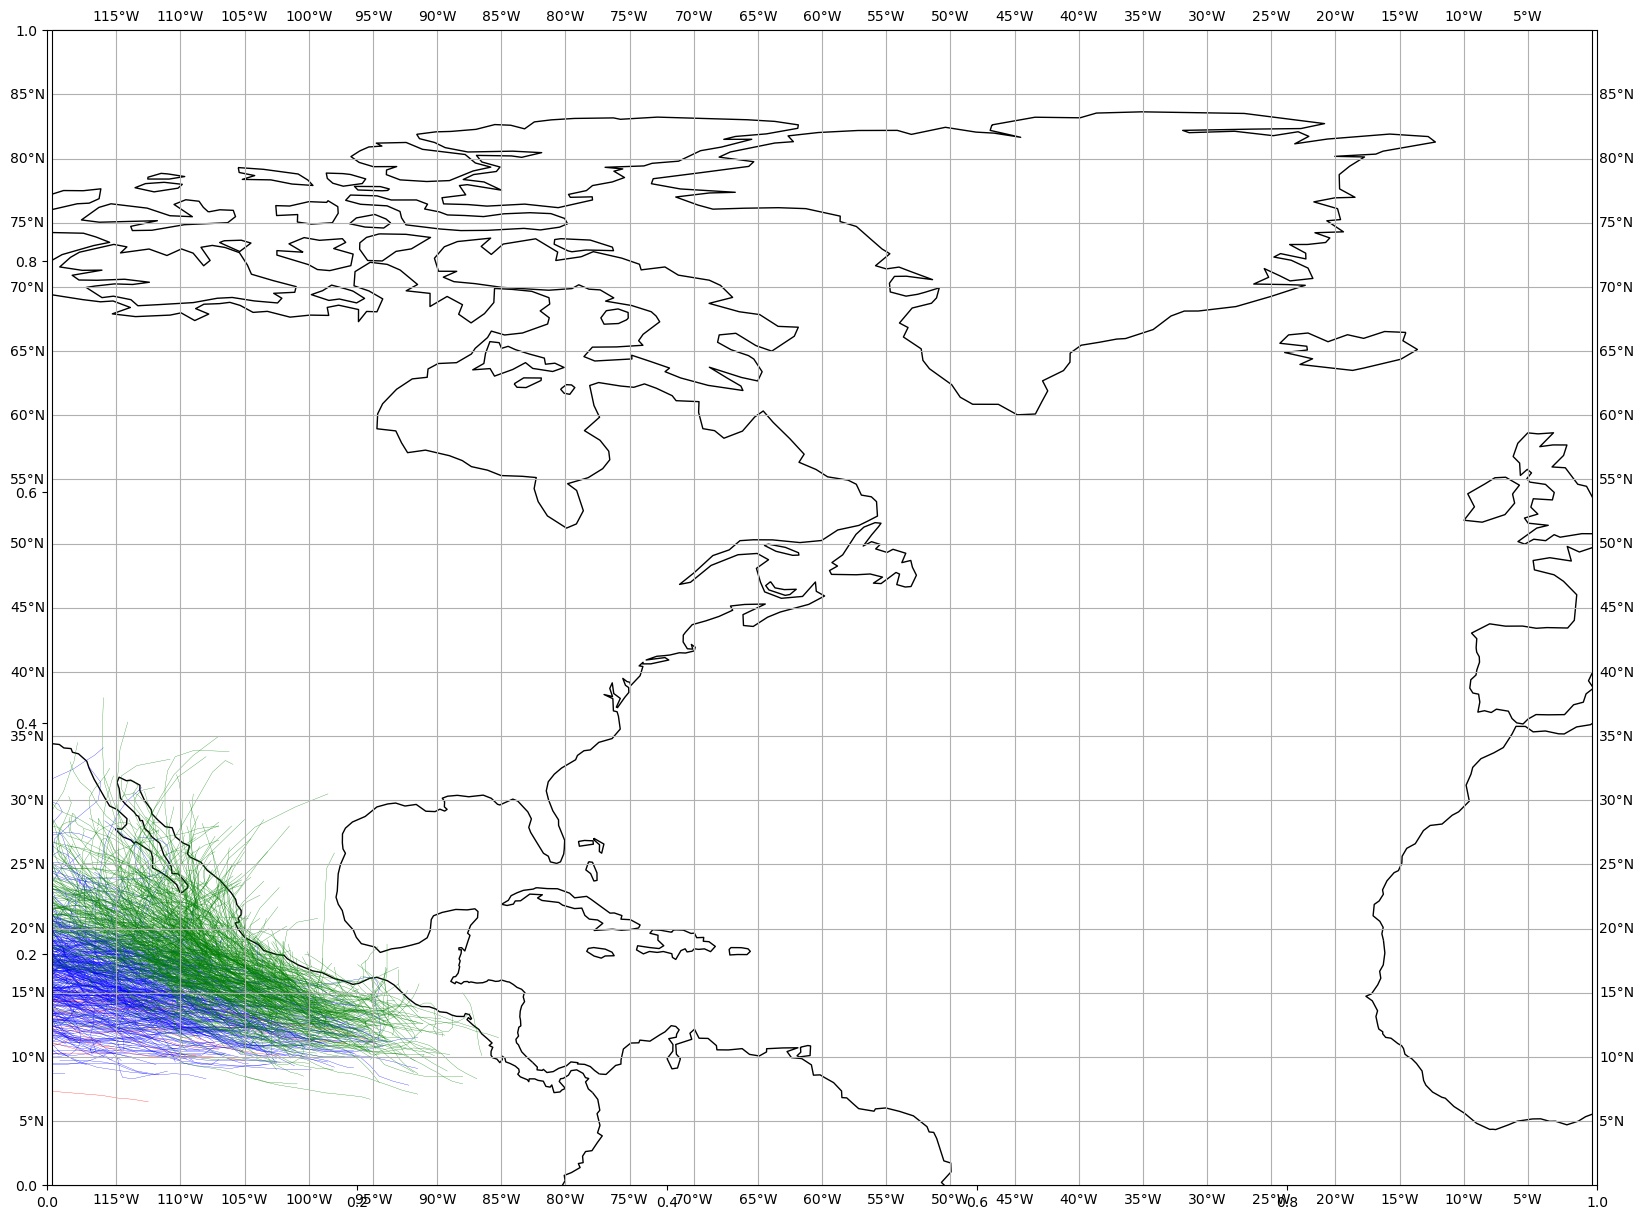

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
for index in range(len(df0)):
    ax.plot(df0['longs'][index],df0['lats'][index],'r-',linewidth=0.2)
for index in range(len(df1)):
    ax.plot(df1['longs'][index],df1['lats'][index],'b-',linewidth=0.2)
for index in range(len(df2)):
    ax.plot(df2['longs'][index],df2['lats'][index],'g-',linewidth=0.2)

plt.show()

In [42]:
def f_transf(lati,longi): 
    if (lati < 90) and (lati >= 0) and (longi < 0) and (longi > -120):
        return (int(lati) * 121) + int((-longi))
    else: 
        return None
def index_to_coord(index):
    return((index/121),(-(index%121)))  

In [43]:
def make_markhov_values(data, mat_in, f_tranf):
    for coord_list in data.iterrows():
        l = len(coord_list[1]['lats'])
        for index in range(l-1):
            pos = f_tranf(coord_list[1]['lats'][index],coord_list[1]['longs'][index])
            pos_pr = f_tranf(coord_list[1]['lats'][index + 1],coord_list[1]['longs'][index + 1])
            if (pos == None) or (pos_pr == None):
                break
            mat_in[pos][pos_pr] = mat_in[pos][pos_pr] + 1
        pos1 = f_tranf(coord_list[1]['lats'][-1],coord_list[1]['longs'][-1])
        if (pos1 != None):
            mat_in[pos1][-1] = mat_in[pos1][-1] + 1
    return mat_in
def fix_probability(mat_in):        
    for i in range(len(mat_in)): 
        if sum(mat_in[i]) == 0:
            mat_in[i][-1] = 1
        l = mat_in[i]/sum(mat_in[i])
        mat_in[i] = l
    return mat_in

In [44]:
size = 10890
def generate(matrix, start_lat, start_long,f_to, f_back):
    path = []
    dead_hur = False 
    curr_index = f_to(start_lat,start_long)
    path.append(f_back(curr_index))
    while not dead_hur: 
        arr = (np.random.choice(range(0,len(matrix)), 1, p=matrix[curr_index]))
        curr_index = arr[0]
        if (curr_index != len(matrix) - 1): 
            path.append(f_back(curr_index))
        else: 
            dead_hur = True
    return path

In [45]:
mat0 = np.zeros(shape=(size,size))
mat0 = make_markhov_values(df0,mat0,f_transf)
mat0 = fix_probability(mat0)

In [46]:
mat1 = np.zeros(shape=(size,size))
mat1 = make_markhov_values(df1,mat1,f_transf)
mat1 = fix_probability(mat1)

In [47]:
mat2 = np.zeros(shape=(size,size))
mat2 = make_markhov_values(df2,mat2,f_transf)
mat2 = fix_probability(mat2)

In [48]:
matALL = np.zeros(shape=(size,size))
matALL = make_markhov_values(dfALL,matALL,f_transf)
matALL = fix_probability(matALL)

In [49]:
pip install reverse_geocoder

Note: you may need to restart the kernel to use updated packages.


In [50]:
import reverse_geocoder as rg
def make_predict(actual_longs,actual_lats, num, matrix):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 15)
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
    ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
    ax.coastlines()
    start_lat = actual_lats[0]
    start_long = actual_longs[0]
    for i in range(num): 
        arr = list(map(list, zip(*generate(matrix,start_lat,start_long,f_transf,index_to_coord))))
        ax.plot(arr[1],arr[0])
        print(i, len(arr[1]), len(arr[0]))
        for j in range(len(arr[1])):
            x = arr[1][j] 
            y = arr[0][j]
            coordinates = (x,y)
            loc = rg.search(coordinates)
            print(loc)
    ax.plot(actual_longs,actual_lats,'bo',markersize=3)
    plt.show()

In [51]:
def predict_path(genesis):
    batch_size = 1;
    atl1_id = None;
    try:
        hurricane = df0.loc[df0['id'] == atl_id]
        make_predict(list(hurricane['longs'])[0],list(hurricane['lats'])[0],batch_size,mat0)
    except: 
        try:
            hurricane = df1.loc[df1['id'] == atl_id]
            make_predict(list(hurricane['longs'])[0],list(hurricane['lats'])[0],batch_size,mat1)
        except: 
            try:
                hurricane = df2.loc[df2['id'] == atl_id]
                make_predict(list(hurricane['longs'])[0],list(hurricane['lats'])[0],batch_size,mat2)
            except: 
                make_predict(genesis[0],genesis[1],batch_size,matALL)

In [52]:
#predict_path('AL122005',(None, None),1)

0 1 1
Loading formatted geocoded file...
[{'lat': '-34.03139', 'lon': '18.41833', 'name': 'Constantia', 'admin1': 'Western Cape', 'admin2': 'City of Cape Town', 'cc': 'ZA'}]


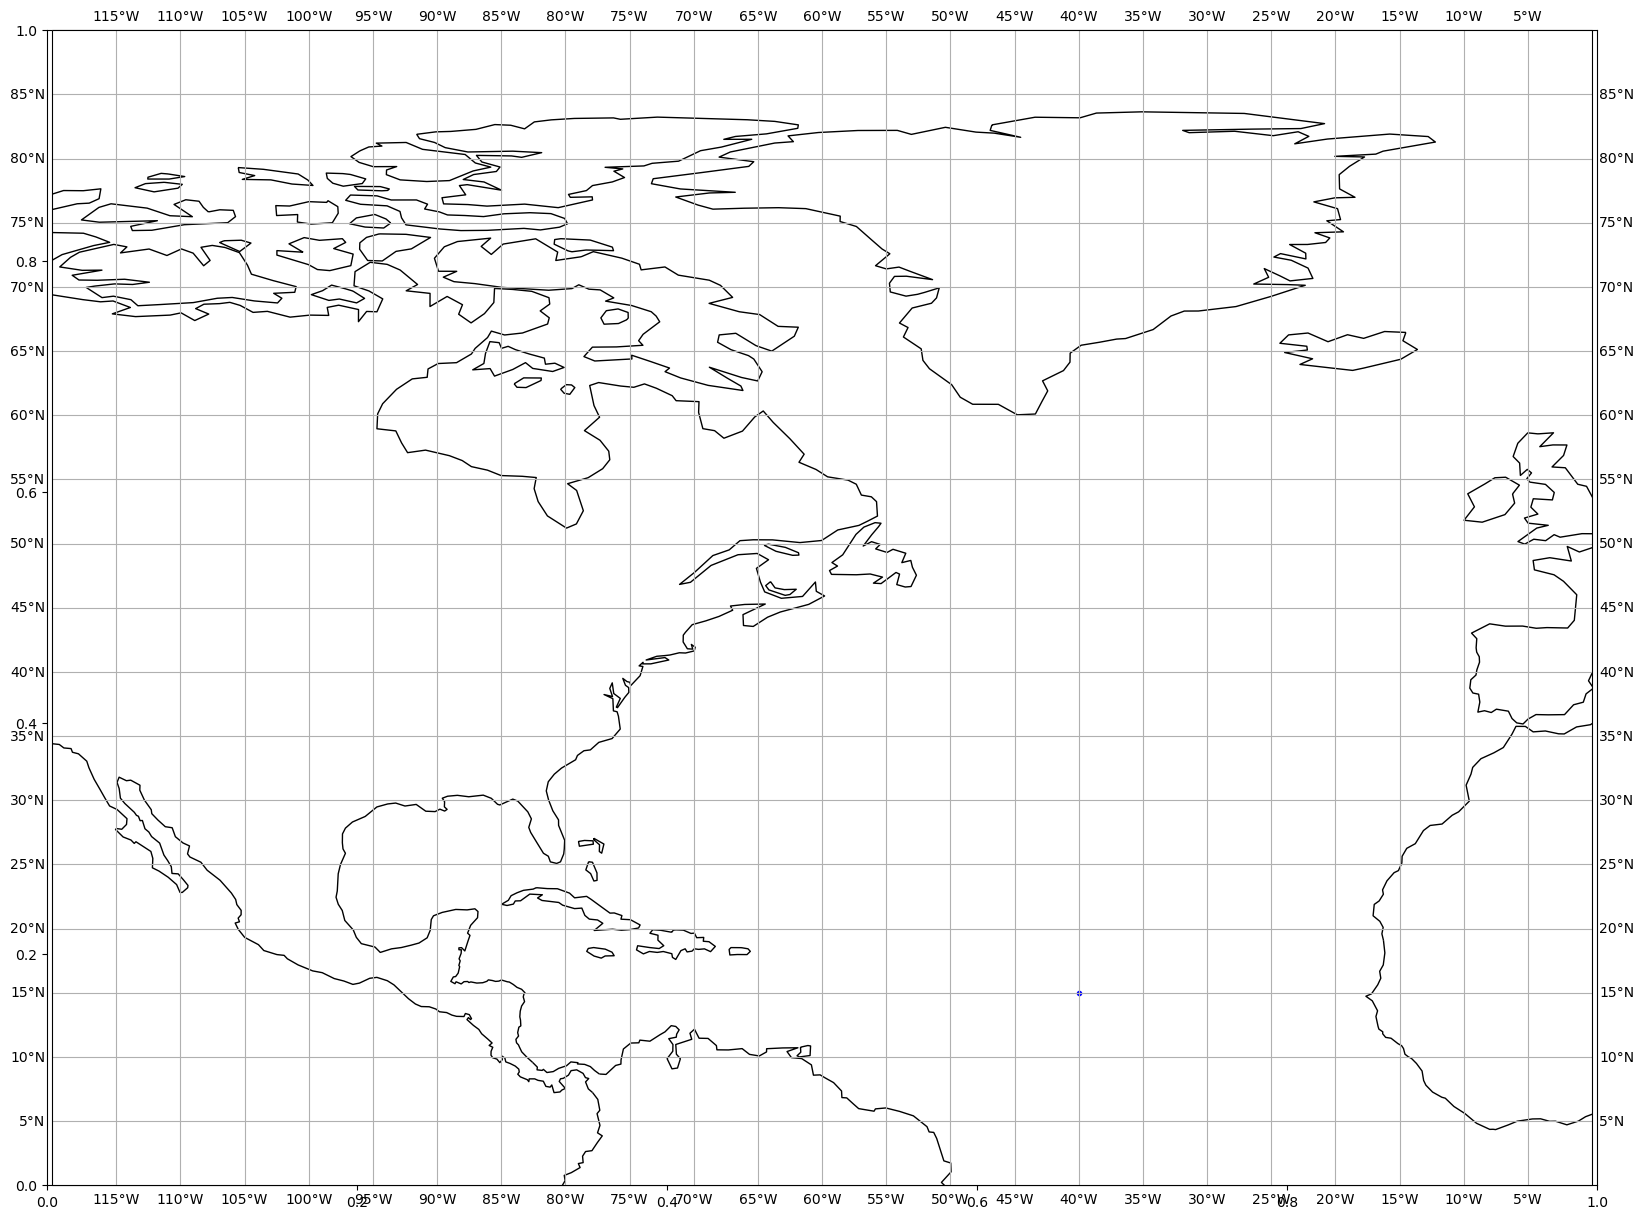

In [53]:
predict_path(([-40], [15]))

0 1 1
[{'lat': '-34.53215', 'lon': '20.04031', 'name': 'Bredasdorp', 'admin1': 'Western Cape', 'admin2': 'Overberg District Municipality', 'cc': 'ZA'}]


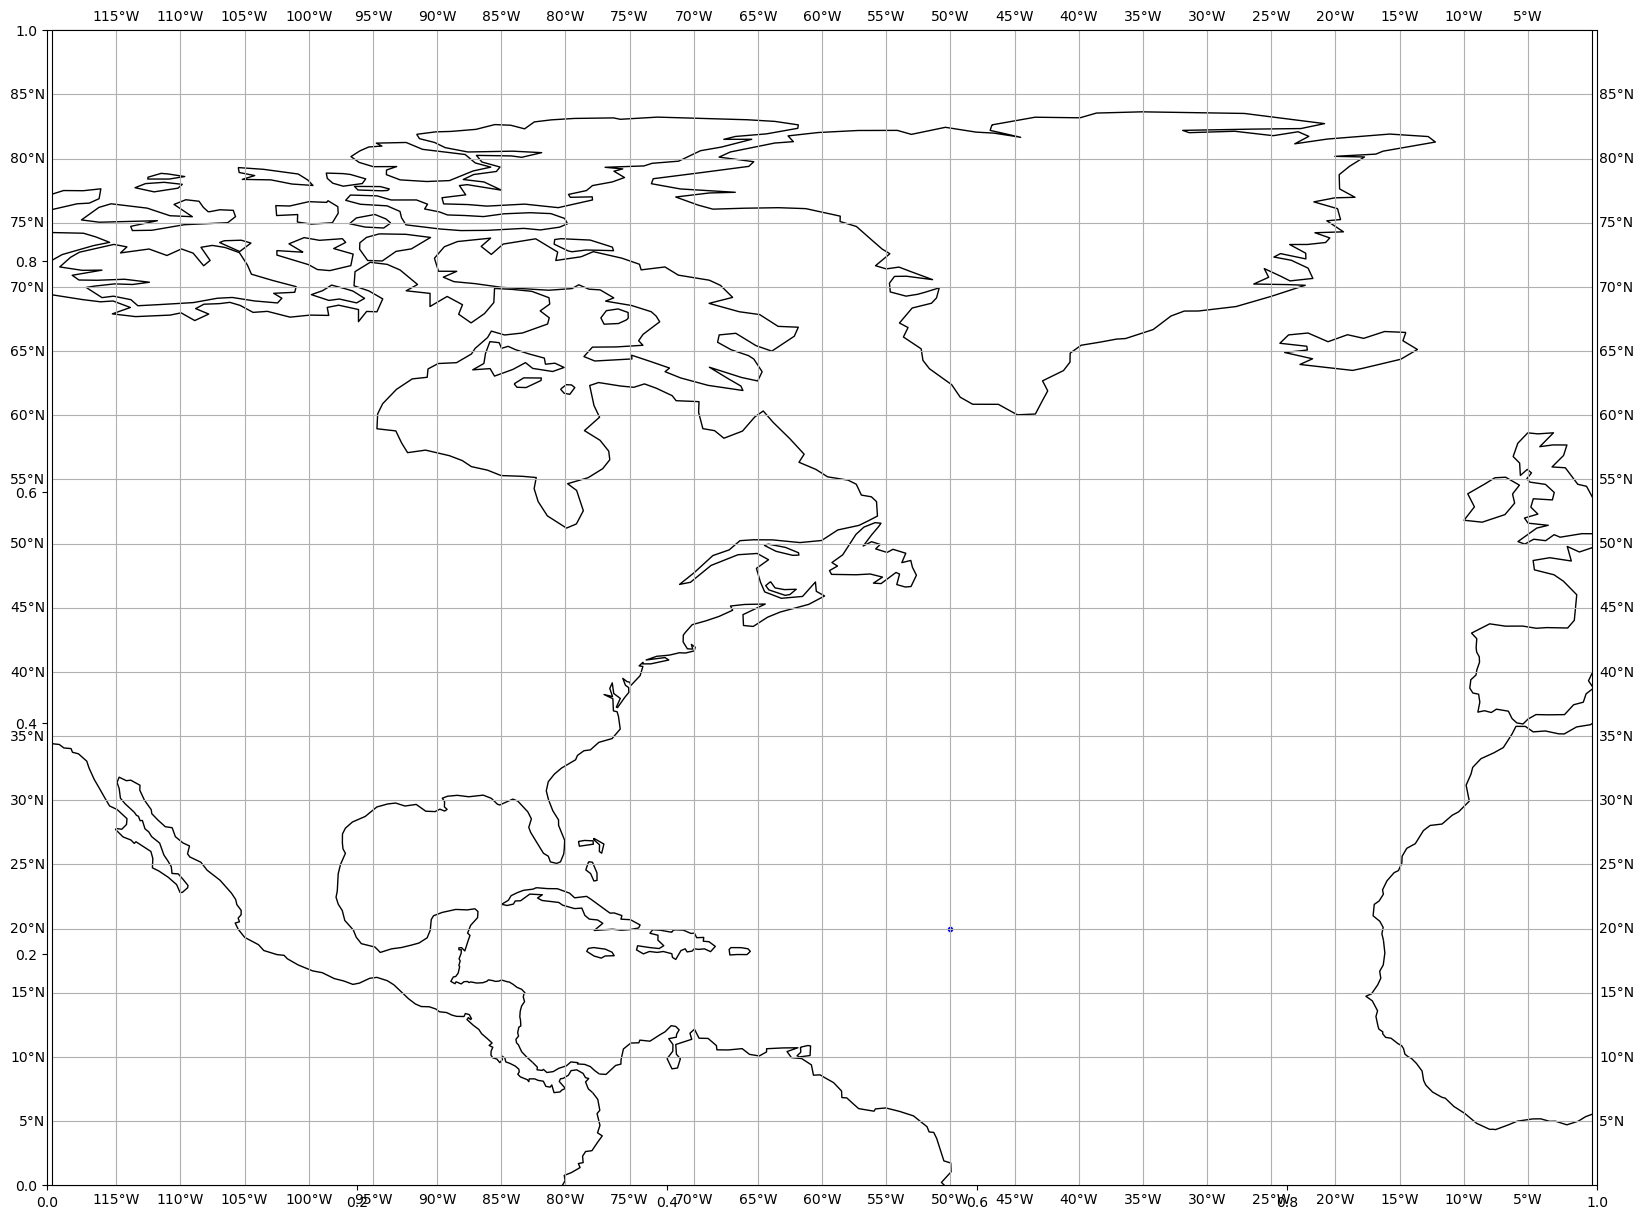

In [54]:
predict_path(([-50], [20]))

0 1 1
[{'lat': '-18.06068', 'lon': '13.83998', 'name': 'Opuwo', 'admin1': 'Kunene', 'admin2': '', 'cc': 'NA'}]


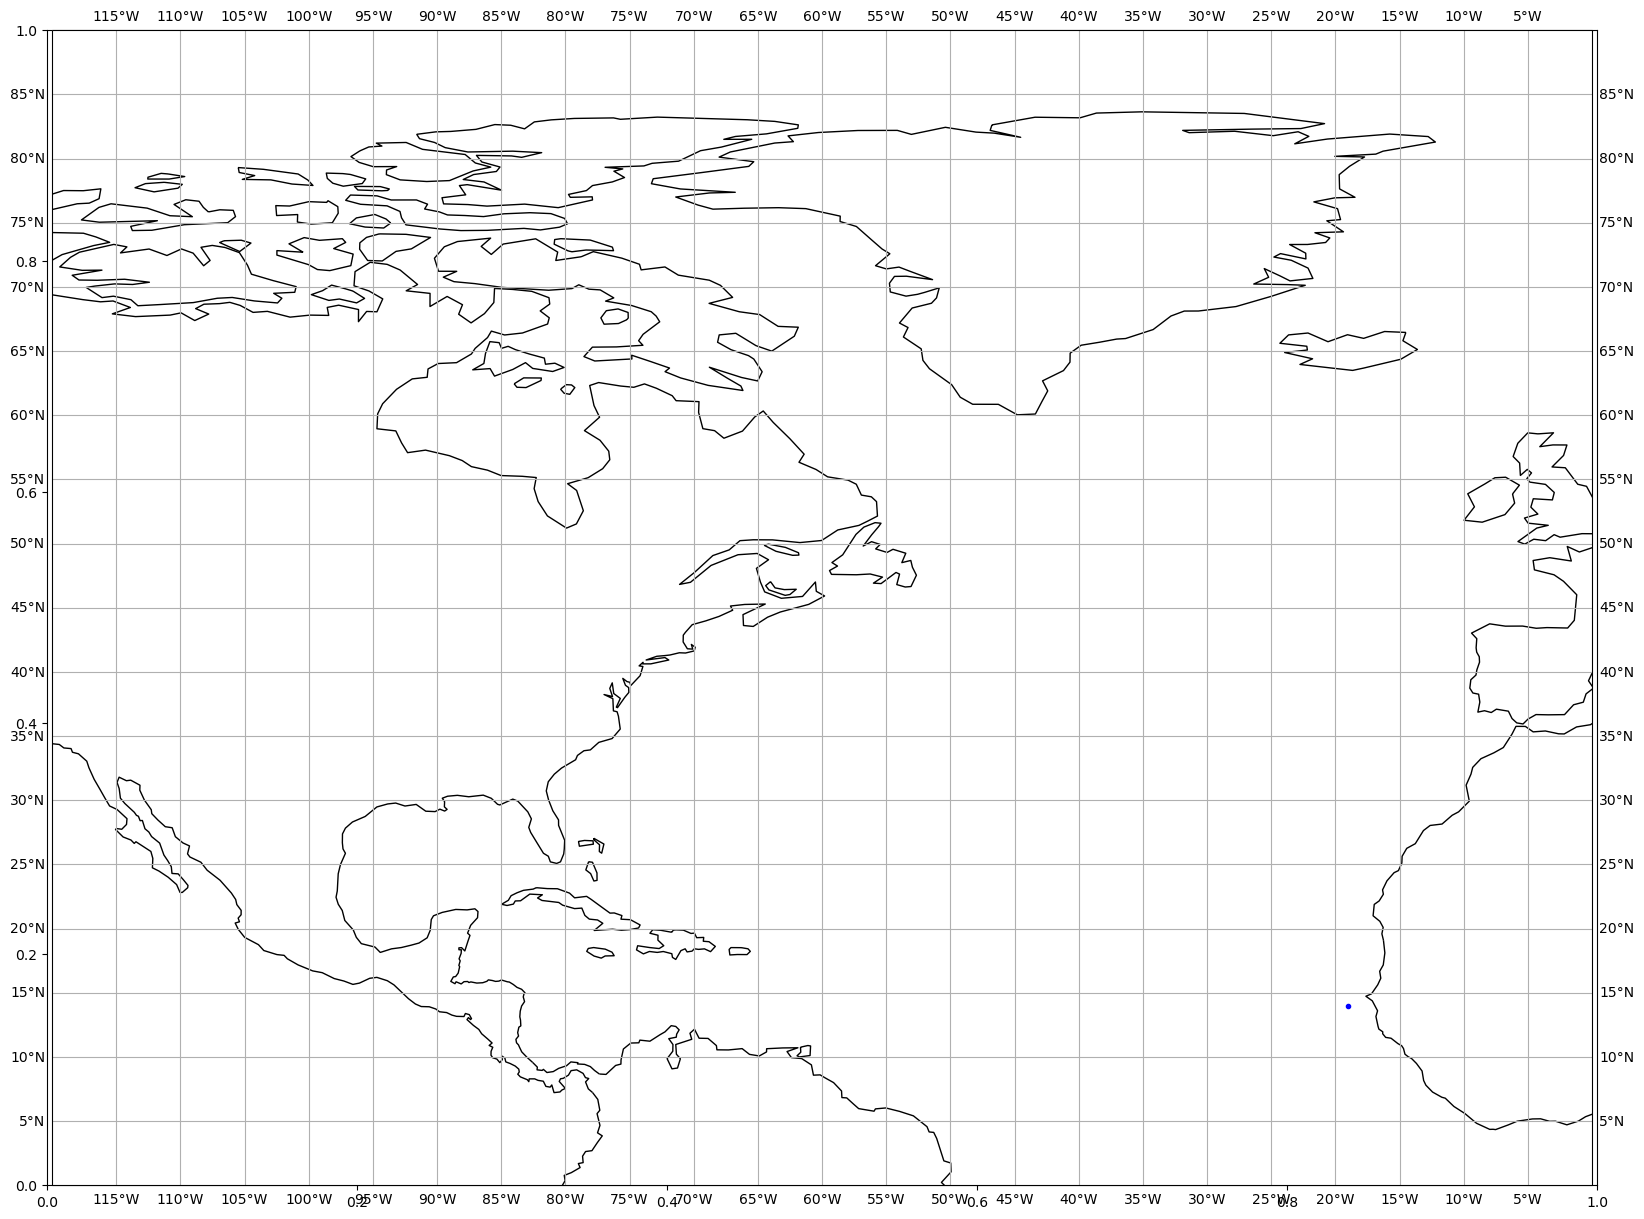

In [55]:
predict_path(([-19], [14]))